# **Project Name** - **Blinkit Analysis**

**Project Type** - EDA

# **Project Summary -**

**This Project focuses on analyzing Blinkit Sales data to understand the factors influcing product and outlet performance . The dataset conatins product-level and Outlet-level information such as item type, fat content, outlet size, location type, establishment year, and total sales.**

**The main objective of the anlysis is to identify key drivers of sales and genrate actionable business insights that can help improve revenue and expansion strategies.**

**Through Exploratory Data Anlysis (EDA), the following steps were performed.**


*   **Data cleaning and preprocessing**
*   **Understanding variable types and their importance**


*   **KPI analysis such as Total sales, Average sales, and product distribution.**
*   **Visualization of relationship between sales and outlet/product features**


*   **Identification of high-performing outlet types and product categories.**

**Key findings from the analysis include:**

*   **Supermarket Type 1 outlets genrate the highest total sales.**


*   **Tier 3 locations contribute significantly more revenue compared to Tier 1 and Tier 2.**

*   **Low Fat products account for a larger share of total sales.**
*   **Sales Distribution shows that a small number of products contribute disproportionatly to total revenue.**

**Based on these findings, the company can focus on expanding high- performing outlet types, strengthening presence in Tier 3 cities, and optimizing product visibility and category stratergies.**

**This project demonstrates the use of Python ( Pandas, Seaborn, Matplotlib) for data anlysis and visualization, along with dashboard-based thinking similar to business intelligence tools like Power BI.**






# **Problem Statement**

**Blinkit is a retail company that sells grocery products across multiple outlets located in different cities and tiers. The company wants to understand the factors affecting product sales and outlet performance.**

**However, with large amounts of sales and outlet data , it becomes difficult to manually identify which factors are driving revenue and which areas need improvement.**

**Therefore, this project aims to analyze the dataset to uncover patterns, trends, and relationships that impact overall sales performance.**

# **Business Objective**

The primary objective of this project is to:



*   **Analyze sales performance across different outlet types and locations.**

*   **Identify top-perfroming product categories.**

*   **Understand the impact of outlet charchteristics (size, type, establishment year) on sales.**
*   **Examine customer preference trends such as Low Fat vs Regular products.**


*   **Provide actionable business insights to improve revenue and expanssion stratergy.**





# **General Guidelines**



*   **Performed data cleaning and processing to ensure accurate analysis.**

*   **Conducted Exploratory Data Analysis(EDA) to understand variable behaviour.**

*   **Used appopriate visualizations based on variable type (Categorical vs numerical).**
*   **Focused on business-driven rather than only technical results.**


*   **Translated data findings into real-world business recomendations.**






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Dataset
file_path= '/content/drive/MyDrive/Colab Notebooks/BlinkIT Grocery Data.xlsx'
#asigned simple name to dataset as df
df= pd.read_excel(file_path)

# ***Dataset First View***

In [ ]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


# ***Dataset Information***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# ***Dataset Rows & Columns count***

In [ ]:
df.index

RangeIndex(start=0, stop=8523, step=1)

In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

# ***Understanding the Variables & Importance***

**The Dataset contains product-level and Outlet-level information.**

**1. Item_Fat_Content - Indicates whether the product is Low Fat or Regular.**

Why is it important?


*   Helps analyze customer preference for healthy vs regular products.**
*   Allows comparison of sales based on fat content. Supports health-based marketing strategies.

**2. Item_Identifier - A unique identification code assigned to each product.**

Why is it important?


*   Used to count total unique products.
*   Useful for grouping and tracking specific items.

**3. Item_Type - Category of the product(e.g., Dairy, Snacks, Soft Drinks, etc.).**

Why is it important?

*   Identifies which product categories genrate higher sales.
*   Helps in inventory planning and demand forecasting.

4. **Item_Visibility - Percentage of total display area allocated to product in store.**

Why is it important?

*   Helps analyze whether higher visibility leads to higher sales.
*  Supports decisions related to product placement.

**5. Item_Outlet_sales(Target Variable) - Total sales of the product in a specific outlet.**

Why is it important?

*   This is the main variable we are analyzing.
*   All business insights revolve around improving the metric.

**6. Outlet_Identifier - Unique ID assigned to each outlet.**

Why is it important?


*   Helps comapre performance across disfferent outlets.
*   Used for grouping store-level sales analysis.

**7. Outlet_Establishment_Year - Year when the outlet was established.**

Why is it important?

*   Helps analyze whether older outlets genrate more sales.
*   Useful to study the relationship between outlet age and revenue.

**8. Outlet_Size - Indicates the size of the outlet(Small ,Medium, High).**

Why is it important?

*   Helps understand whether larger stores genrate higher sales.

**9. Outlet Location Type - Indicates the tier classification of the city(Tier 1, Tier 2, Tier 3).**

Why is it important?

*   Helps analyze sales performance across different city types.
*   Supports expansion stratergy decisions.

**10. Outlet_Type - Type of Outlet( Supermarket Type 1, Grocery Store, etc.).**

Why is it important?

*   Helps comapre performance of different business models.
*   Identifies which outlet type genrates maximum revenue.









# ***Data Cleaning Section***

In [ ]:
#Replace Fat Content Values -> To standardize inconsistent categorical values.

df["Item Fat Content"] = df["Item Fat Content"].str.lower()

df["Item Fat Content"] = df["Item Fat Content"].replace({
    "lf": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular",
    "regular": "Regular"
})

In [ ]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Low Fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,Low Fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,Low Fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,Regular,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


# ***Missing Values/Null Values***

In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [ ]:
# to prevent erros in anlysis
df["Item Weight"].fillna(df["Item Weight"].mean(), inplace=True)

/tmp/ipython-input-1085943652.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item Weight"].fillna(df["Item Weight"].mean(), inplace=True)


# ***KPI Summary***

In [ ]:
total_sales = df["Sales"].sum()
print("Total Sales:", total_sales)


Total Sales: 1201681.4928


**1. Total Sales**

*   **Total sales represents the overall revenue genrated from all items across all outlets**.
*   **It helps in understanding the overall business performance and revenue strength.**




In [ ]:
avg_sales = df["Sales"].mean()
print("Average Sales:", avg_sales)

Average Sales: 140.99278338613163


**2. Average Sales**



*   **Average Sales Shows the mean revenue per transaction sold.**
*   **The metric helps evaluate revenue efficency and customer spending behaviour.**



In [ ]:
total_items = df["Item Identifier"].count()
print("Total Items:", total_items)

Total Items: 8523


**3. Total Items Sold**



*   **Total Items indicates the totaal quantity of items sold.**
*   **It helps in understanding sales volume and supports inventory and demand planning.**


In [ ]:
avg_rating = df["Rating"].mean()
print("Average Rating:", avg_rating)

Average Rating: 3.965857092573038


**4. Average Rating**

*  **Average Rating Represents the average customer satisfaction score.**
*  **It helps assess product quality and long-term sustainability of the business.**



## ***Insight***

**From the KPIs analysis, the business shows strong overall revenue with consistent average sales per transaction. The Total number of items sold indicates steady demand , while the average rating reflects moderate customer satisfication level.**

# ***Data Vizualization, Storytelling & Experimenting with charts***

Chart - 1

# **Total Sales by Item Fat Content**

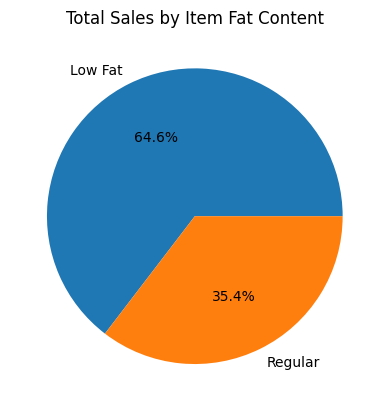

In [ ]:
import matplotlib.pyplot as plt
fat_sales = df.groupby("Item Fat Content")["Sales"].sum()

plt.figure()
plt.pie(fat_sales, labels=fat_sales.index, autopct="%1.1f%%")
plt.title("Total Sales by Item Fat Content")
plt.show()

1. Why did you pick the specific chart?

**I used a pie chart because I wanted to show the percentage contribution of Low Fat and Regular products to total sales.**
**Pie charts are useful when we want to show proportion or share**.

2. What are the Business insight(s) found from the chart?

* **Which type sells more?** **Low Fat or Regular?**
*   **It helps in product positioning & marketing stratergy.**



Chart - 2

# **Total Sales by Outlet Type**

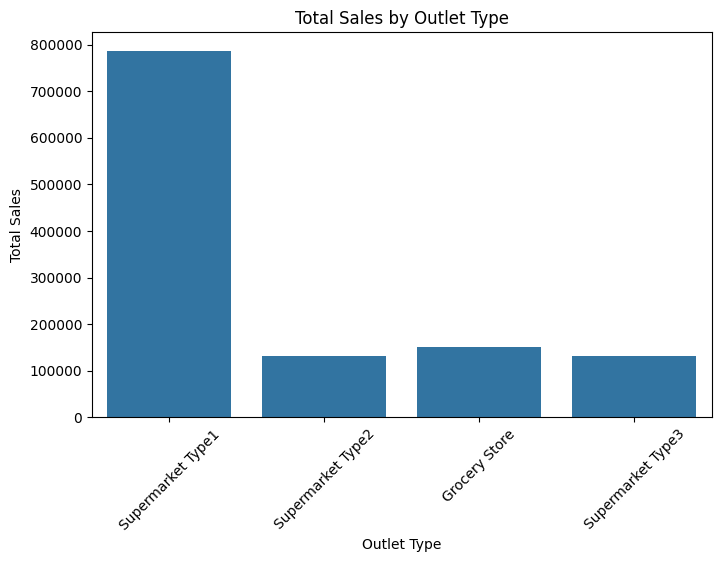

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Outlet Type",
            y="Sales",
            data=df,
            estimator=sum, #shows the mean(avg)
            errorbar=None)

plt.xticks(rotation=45) # rotates x-axis labels
plt.title("Total Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Total Sales")
plt.show()

1. Why did you pick the specific chart?

**I picked a bar chart because Outlet Type is a categorical variable, and I wanted to compare total sales across different outlet types.
Bar charts are best for comparing values between categories clearly.**

2. What are the Business insight(s) found from the chart?


*  **From the chart, we can see which outlet type is generating the highest total sales.Supermarket Type1 has the highest sales compared to other outlet types.**
*  **The company can focus more on this type of outlet for future expansion.**




Chart - 3

# **Total Sales by Outlet Location Type**

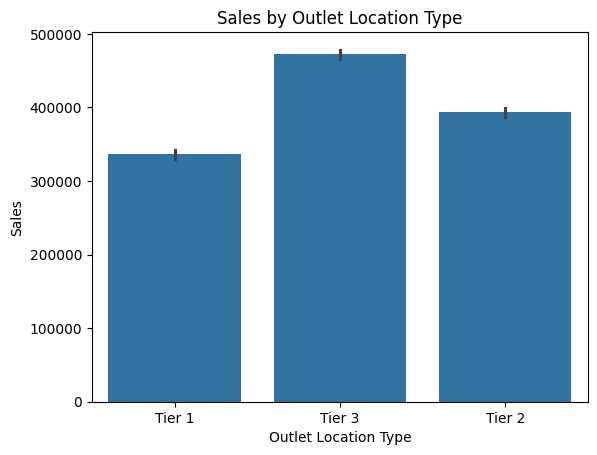

In [ ]:
plt.figure()
sns.barplot(x="Outlet Location Type", y="Sales", data=df, estimator=sum)
plt.title("Sales by Outlet Location Type")
plt.show()

1. Why did you pick the specific chart?

**I selected a bar chart beacause I needed to compare total sales across different location tiers. Bar chart clearly shows which category perform better.**

2. What are the Business insight(s) found from the chart?



*   **Tier 3 outlets genrate the Highest sales compared to Tier 1 and Tier 2.** **This suggest that Tiewr 3 locations are more profitable.**
*   **The company can consider expanding more outlets in Tier 3 Cities.**



Chart - 4

# **Sales by Item Type**

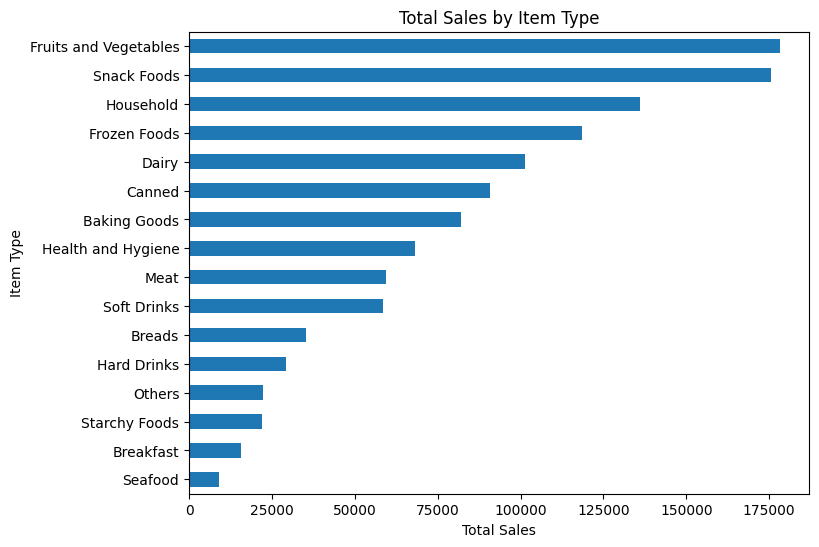

In [ ]:
plt.figure(figsize=(8,6))
sales_item = df.groupby("Item Type")["Sales"].sum().sort_values()

sales_item.plot(kind="barh")
plt.title("Total Sales by Item Type")
plt.xlabel("Total Sales")
plt.ylabel("Item Type")
plt.show()

1. Why did you pick this specific chart?

**I used a Horizontal bar chart instead of Vertical because there are many items types, and horizontal layout improves readability and avoids labe; overlapping.**

2. What are the Business Insights from this chart?

**Some product categories genrate significantly higher sales than others.**
**The company should maintain good stock for high-performing categories and improve strategies for low-performing ones.**

Chart - 5

# **Item Visibility vs Sales**

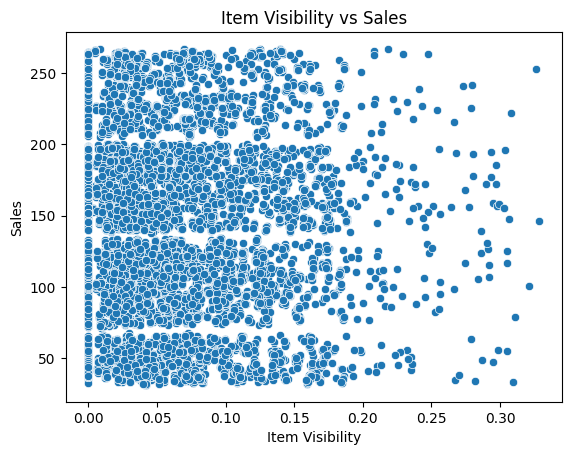

In [ ]:
plt.figure()
sns.scatterplot(x="Item Visibility", y="Sales", data=df)
plt.title("Item Visibility vs Sales")
plt.show()

1. Why did you pick this chart?

**I use Scatter plot because both Item Visibility and Sales are numerical variables.**
**Scatter plots help in understanding the relationship between two numeric variables.**

2. What are the Business Insights from this chart?



*   **From the graph , we can observe whether higher visibility leads to higher sales.**
*   **If there is a positive trend, it means product placement plays an important rile in revenue.**



Chart - 6

# **Outlet Establishment Year vs Sales**

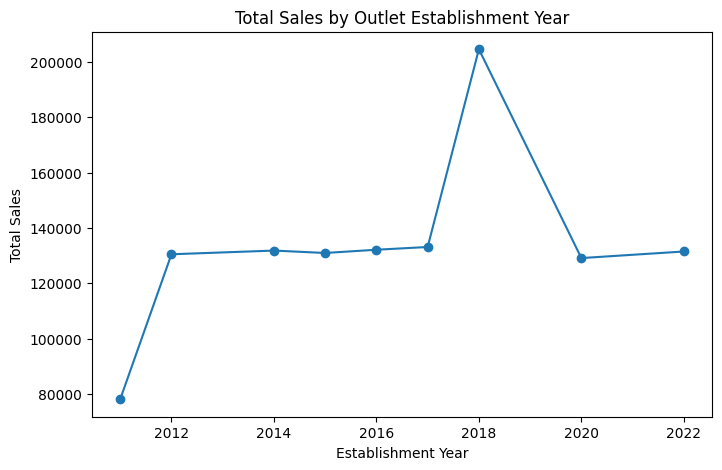

In [ ]:
plt.figure(figsize=(8,5))

sales_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()

plt.plot(sales_year.index, sales_year.values, marker='o')
plt.title("Total Sales by Outlet Establishment Year")
plt.xlabel("Establishment Year")
plt.ylabel("Total Sales")
plt.show()

1. Why did you pick this chart?

**I used line chart to analyze the sales trend across different years. It helps identify whether newer outlets are genrating more sales compared to older ones.**

2. What are the Business Insights from this chart?

**From this chart, we can observe how outlet performance changes based on establishment year. If never outlets show higher sales, it may indicate better location stratergy or modern store formats. If older outlets perform better, it shows strong brand loyalty and stable customer base.**

Chart - 7

# **Sales Distribution**

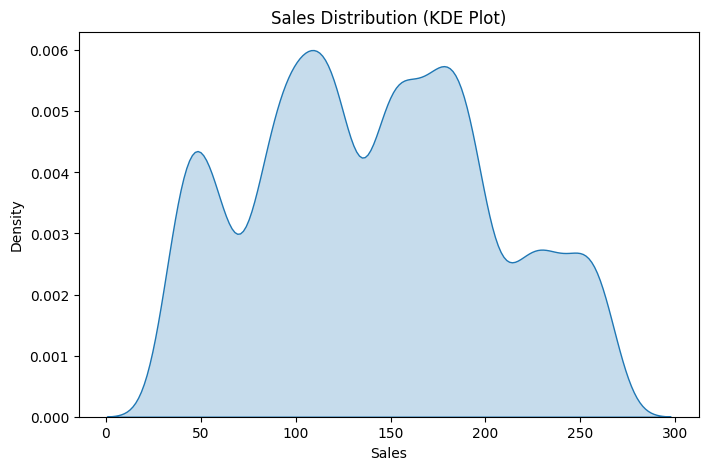

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df["Sales"], fill=True)
plt.title("Sales Distribution (KDE Plot)")
plt.show()

1. Why did you pick this specific chart?

**I chose KDE plot to see how sales values are distributed and to understand whether most products have low sales or high sales.**

2. What are the Business Insights from this chart?

**This shows that revenue may be concentrated in limited high- performing products. The company can fcus on promoting medium-performing products to increase overall revenue.**

Chart - 8
# **Correlation Analysis of Numerical Features**

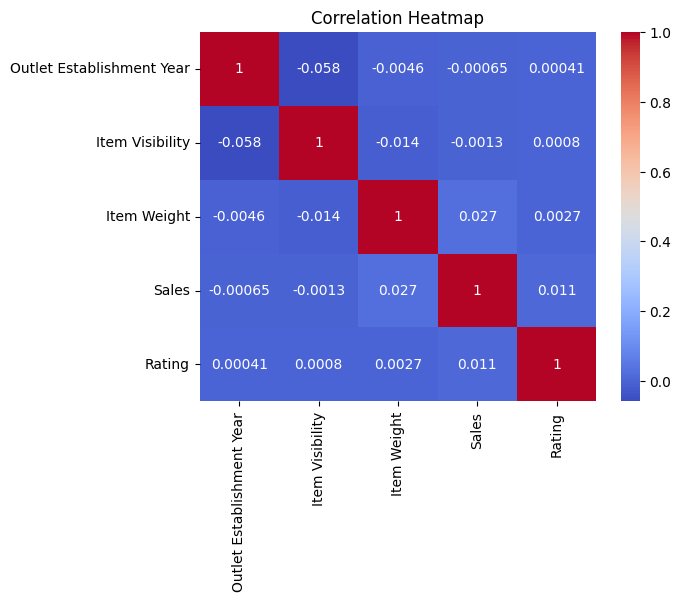

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

1. Why did you pick this specific chart?

**I used a correlation heatmap to understand the relationship between numerical values in th dataset. It helps to quickly identify whether variables like item visibility, outlet establishment year, or weight have a positive or negative relationship with sales.**

2. What are the Business Insights from this chart?

**From the heatmap, we observe that Item Visibility has a very weak correlation with sales, which suggest that simply increasing product visibility may not significantly impact revenue.**

**Similary, Outlet Establishment Year weak correlation with sales, meaning older outlets do not necessarily genrate higher sales.**

**This indicates that sales performance is influenced by multiple combined factors rather than a single numerical variable.**

# ***Final Business Recommendations***

**Key Recommendations:**



*  **Focus more on high-performing outlet types and expand similar models in Tier 1 and Tier 2 cities.**

*  **Promote top-selling product categories to maximize revenue contribution.**
*   **Improve marketing strategies rather than only increasing product visibility, as visibility alone shows weak correlation with sales.**


*   **Analyze low-performing outlets and redesign product mix or pricing strategies.**

*   **Use data-driven decision-making before expanding new outlets.**






# **Conclusion**

**This project successfully analyzed Blinkit's sales dataset to identify key factors influencing revenue performance. Through data cleaning, visualization, and correlation anlysis, meanigful business insights were derived regarding product categories, outlet performance, and customer trends.**

**The findings indicate that sales are influenced by multiple combined factors rather than a single variable. The insights genrated from this analysis can help the business make strategic decisions related to expansion, marketing, and product positioning.**

**This project demonstrates the practical application of Exploratory Data Analysis in solving real-world business problems.**